In [1]:
#load python packages
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis. What fraction of the observed users were retained?

In [2]:
#load data 
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [5]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [7]:
most_recent_date = df['last_trip_date'].max()
most_recent_date

Timestamp('2014-07-01 00:00:00')

In [8]:
# since data was pulled around 2014-07-01, drivers were retained if last trip was in 2014-06
df['retained'] = np.where((df.last_trip_date >= '2014-06-01') & (df.last_trip_date <= '2014-07-01'), 1, 0)

In [10]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [11]:
# percent of drivers retained
percent_retained = df['retained'].sum()/df['retained'].count()*100
percent_retained

37.608000000000004

In [16]:
df.describe().round(decimals=2).T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.28,3.79,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41878.0,4.60,0.62,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.07,0.22,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.85,19.96,0.0,0.00,0.00,8.60,100.00
weekday_pct,50000.0,60.93,37.08,0.0,33.30,66.70,100.00,100.00
avg_dist,50000.0,5.80,5.71,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.78,0.45,1.0,4.70,5.00,5.00,5.00
retained,50000.0,0.38,0.48,0.0,0.00,0.00,1.00,1.00


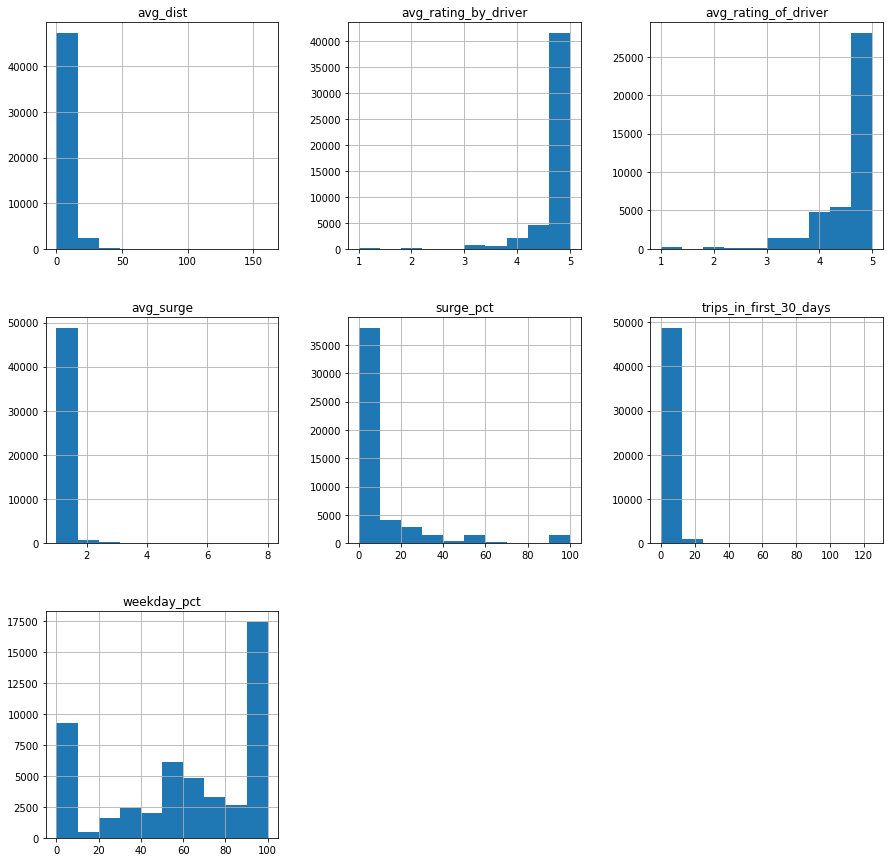

In [22]:
numerical=['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']
df.hist(column=numerical, figsize=(15,15))
plt.show()

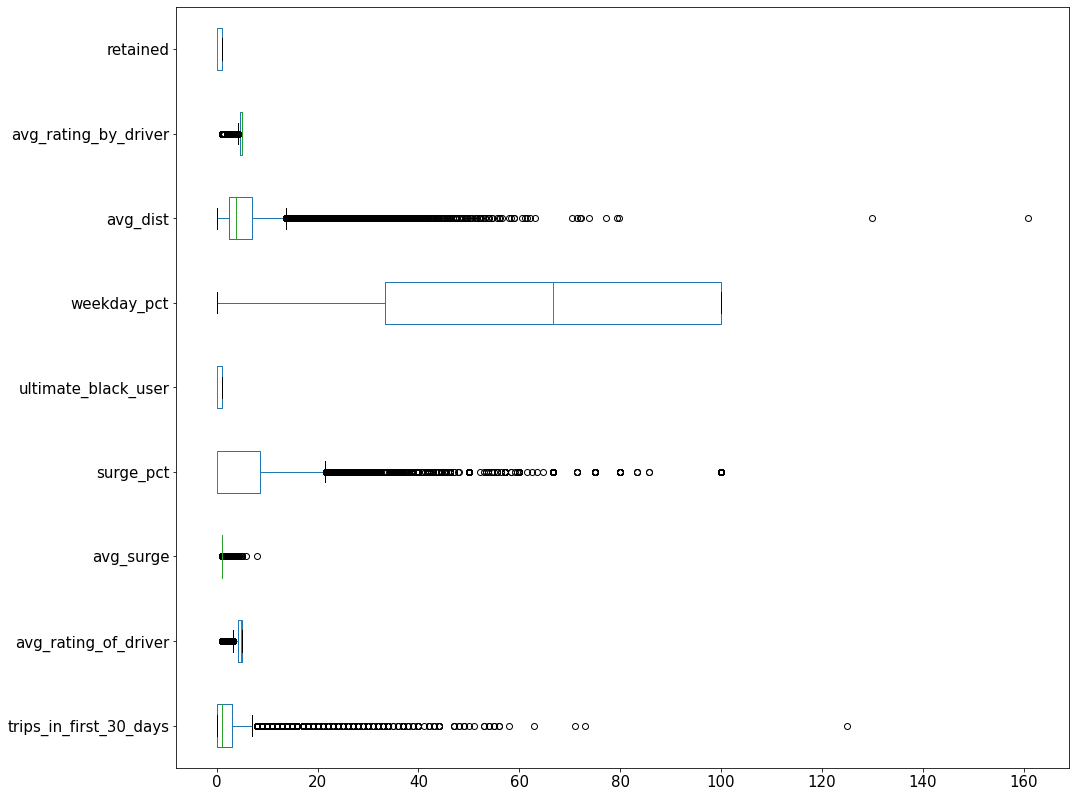

In [18]:
df.boxplot(grid=False, vert=False, figsize=(16, 14), fontsize=15)

In [24]:
df.corr().round(decimals=2)

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
trips_in_first_30_days,1.00,-0.01,-0.00,0.01,0.11,0.05,-0.14,-0.04,0.21
avg_rating_of_driver,-0.01,1.00,-0.03,-0.00,-0.00,0.01,0.03,0.12,-0.01
avg_surge,-0.00,-0.03,1.00,0.79,-0.08,-0.11,-0.08,0.01,-0.00
surge_pct,0.01,-0.00,0.79,1.00,-0.11,-0.14,-0.10,0.02,0.01
ultimate_black_user,0.11,-0.00,-0.08,-0.11,1.00,0.04,0.03,0.01,0.21
weekday_pct,0.05,0.01,-0.11,-0.14,0.04,1.00,0.10,0.02,0.01
avg_dist,-0.14,0.03,-0.08,-0.10,0.03,0.10,1.00,0.08,-0.09
avg_rating_by_driver,-0.04,0.12,0.01,0.02,0.01,0.02,0.08,1.00,-0.03
retained,0.21,-0.01,-0.00,0.01,0.21,0.01,-0.09,-0.03,1.00


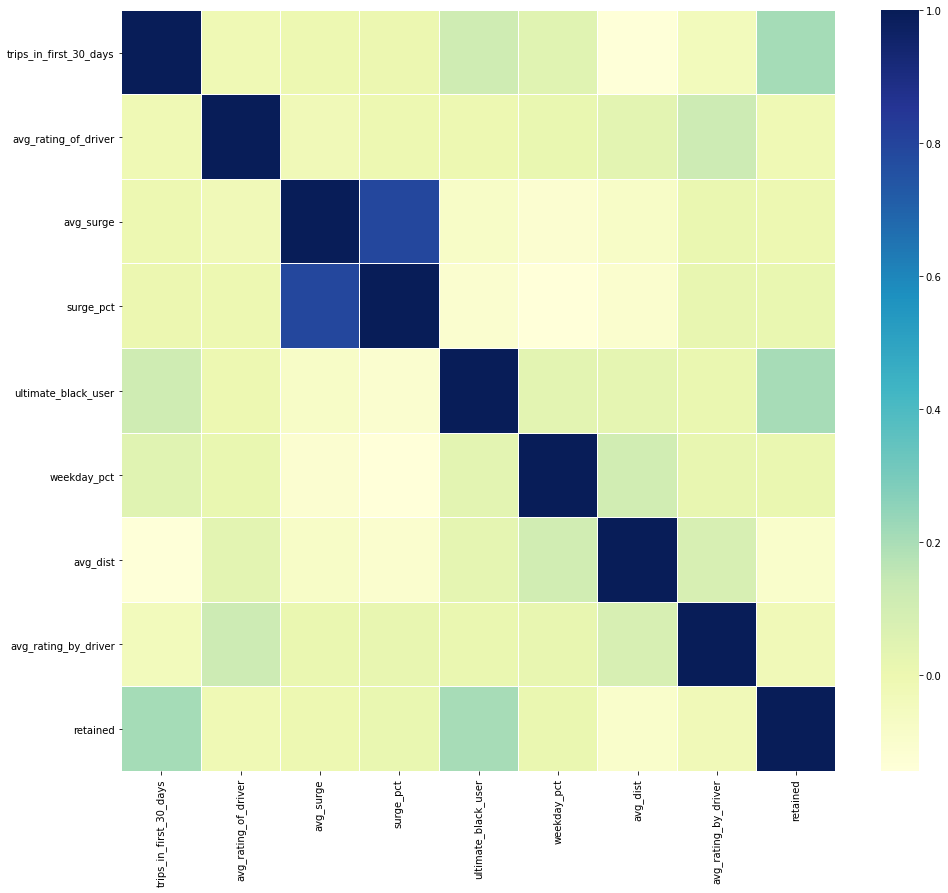

In [25]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu")

In [26]:
df.ultimate_black_user.value_counts()

False    31146
True     18854
Name: ultimate_black_user, dtype: int64

In [28]:
df['ultimate_black_user_ind'] = np.where(df.ultimate_black_user == True, 1, 0)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,ultimate_black_user_ind
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,0


In [29]:
df.trips_in_first_30_days.unique()

array([  4,   0,   3,   9,  14,   2,   1,   6,  24,   5,   7,  11,  73,
         8,  10,  22,  15,  13,  17,  20,  12,  42,  27,  26,  18,  16,
        40,  28,  19,  23,  33,  48,  31,  71,  25,  21,  34,  29,  30,
        32,  47,  37,  53,  43,  44,  38,  39,  49,  55, 125,  41,  50,
        63,  35,  54,  56,  36,  51,  58])

In [32]:
df_no_trips = df[df['trips_in_first_30_days']==0]
df_no_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15390 entries, 1 to 49999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city                     15390 non-null  object        
 1   trips_in_first_30_days   15390 non-null  int64         
 2   signup_date              15390 non-null  datetime64[ns]
 3   avg_rating_of_driver     11641 non-null  float64       
 4   avg_surge                15390 non-null  float64       
 5   last_trip_date           15390 non-null  datetime64[ns]
 6   phone                    15312 non-null  object        
 7   surge_pct                15390 non-null  float64       
 8   ultimate_black_user      15390 non-null  bool          
 9   weekday_pct              15390 non-null  float64       
 10  avg_dist                 15390 non-null  float64       
 11  avg_rating_by_driver     15296 non-null  float64       
 12  retained                 15390 n

In [34]:
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)

In [35]:
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)

In [37]:
#drop features from dataframe for modeling
df_dropped = df.drop(['city', 'signup_date', 'last_trip_date', 'phone', 'ultimate_black_user', 'retained'], axis=1)
df_dropped.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,ultimate_black_user_ind
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0


In [38]:
#Create dummy or indicator features for categorical variables
df_dummy = pd.get_dummies(data=df[['city']])
df_dummy.head()

,city_Astapor,city_King's Landing,city_Winterfell
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,0,1


In [39]:
df_concat = pd.concat([df_dropped, df_dummy], axis=1)
df_concat.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,ultimate_black_user_ind,city_Astapor,city_King's Landing,city_Winterfell
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,0
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,1,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,1,0,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,0
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,0,1


In [40]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trips_in_first_30_days   50000 non-null  int64  
 1   avg_rating_of_driver     50000 non-null  float64
 2   avg_surge                50000 non-null  float64
 3   surge_pct                50000 non-null  float64
 4   weekday_pct              50000 non-null  float64
 5   avg_dist                 50000 non-null  float64
 6   avg_rating_by_driver     50000 non-null  float64
 7   ultimate_black_user_ind  50000 non-null  int64  
 8   city_Astapor             50000 non-null  uint8  
 9   city_King's Landing      50000 non-null  uint8  
 10  city_Winterfell          50000 non-null  uint8  
dtypes: float64(6), int64(2), uint8(3)
memory usage: 3.2 MB


In [41]:
from sklearn.model_selection import train_test_split
X = df_concat
y = df['retained']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=629)

In [42]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.model_selection

Cs = [0.001, 0.1, 1, 10, 100]
logistic = LogisticRegression()
hyperparameters = dict(C=Cs)
clf = sklearn.model_selection.GridSearchCV(logistic, hyperparameters, cv=5)
best_model = clf.fit(X_test, y_test)
Best_C = best_model.best_estimator_.get_params()['C']
print('Best C:', Best_C)

/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

Best C: 100


/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

0.7080666666666666


/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


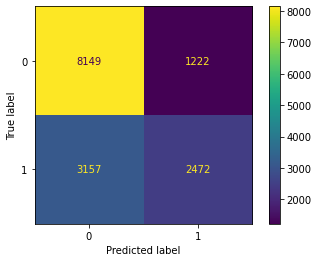

In [43]:
clf = LogisticRegression(C=Best_C)
clf.fit(X_train, y_train)
print(accuracy_score(clf.predict(X_test), y_test))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, values_format = '.5g')  
plt.show() 

Model Entropy - no max depth
Accuracy: 0.7004666666666667
Balanced accuracy: 0.679613120985982


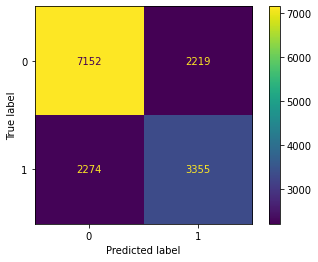

In [44]:
from sklearn import tree, metrics
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)

print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
plot_confusion_matrix(entr_model, X_test, y_test, values_format = '.5g')  
plt.show()

Model Entropy - max depth - 5
Accuracy: 0.7532
Balanced accuracy: 0.7262160285208394


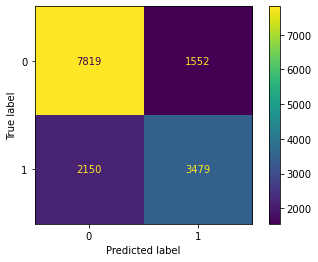

In [45]:
entr_model = tree.DecisionTreeClassifier(criterion="entropy",  max_depth=5, random_state = 1234)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)

print("Model Entropy - max depth - 5")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
plot_confusion_matrix(entr_model, X_test, y_test, values_format = '.5g')  
plt.show()

Model Entropy - max depth - 5
Accuracy: 0.7651333333333333
Balanced accuracy: 0.7353411346666792


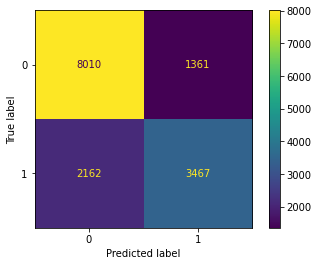

In [47]:
entr_model = tree.DecisionTreeClassifier(criterion="entropy",  max_depth=8, random_state = 1234)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)

print("Model Entropy - max depth - 8")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
plot_confusion_matrix(entr_model, X_test, y_test, values_format = '.5g')  
plt.show()

Model Gini Impurity - no max depth
Accuracy: 0.6978
Balanced accuracy: 0.676485727532727


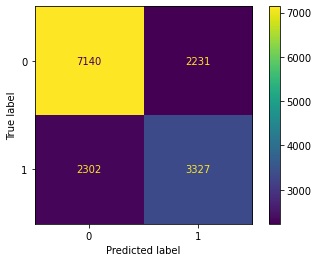

In [48]:
gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state = 1234)
gini_model.fit(X_train, y_train)
y_pred = gini_model.predict(X_test)
y_pred = pd.Series(y_pred)

print("Model Gini Impurity - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

plot_confusion_matrix(gini_model, X_test, y_test, values_format = '.5g')  
plt.show()  

Model Gini - max depth - 5
Accuracy: 0.7532
Balanced accuracy: 0.7262160285208394


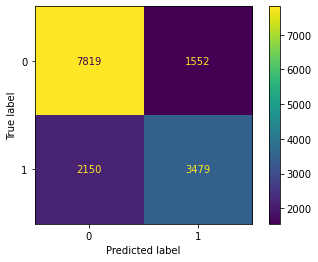

In [61]:
gini_model = tree.DecisionTreeClassifier(criterion="gini", max_depth=5, random_state = 1234)
gini_model.fit(X_train, y_train)
y_pred = gini_model.predict(X_test)
y_pred = pd.Series(y_pred)

print("Model Gini - max depth - 5")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

plot_confusion_matrix(gini_model, X_test, y_test, values_format = '.5g')  
plt.show()  

Model Gini - max depth - 8
Accuracy: 0.7656666666666667
Balanced accuracy: 0.7367256633393403


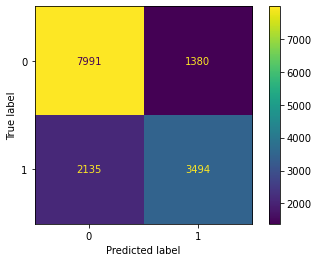

In [50]:
gini_model = tree.DecisionTreeClassifier(criterion="gini", max_depth=8, random_state = 1234)
gini_model.fit(X_train, y_train)
y_pred = gini_model.predict(X_test)
y_pred = pd.Series(y_pred)

print("Model Gini - max depth - 8")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

plot_confusion_matrix(gini_model, X_test, y_test, values_format = '.5g')  
plt.show()  

Random Forest Model - no max depth
Accuracy: 0.7424666666666667
Balanced accuracy: 0.7231234885716811


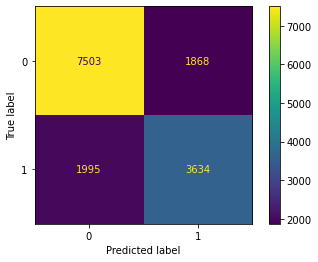

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

RFModel = RandomForestClassifier(random_state = 1234)
RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)
y_pred = pd.Series(y_pred)

print("Random Forest Model - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

plot_confusion_matrix(RFModel, X_test, y_test, values_format = '.5g')  
plt.show() 

Random Forest Model - max depth - 4
Accuracy: 0.7497333333333334
Balanced accuracy: 0.699712332049381


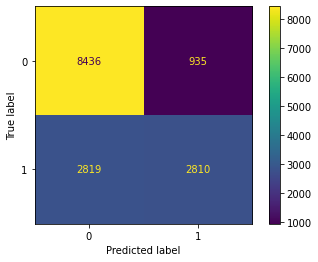

In [62]:
RFModel = RandomForestClassifier(random_state = 1234, max_depth=4)
RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)
y_pred = pd.Series(y_pred)

print("Random Forest Model - max depth - 4")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

plot_confusion_matrix(RFModel, X_test, y_test, values_format = '.5g')  
plt.show() 

Random Forest Model - max depth - 10
Accuracy: 0.7756
Balanced accuracy: 0.7487547289437204


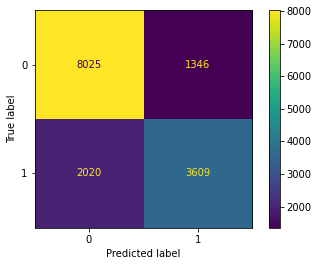

In [59]:
RFModel = RandomForestClassifier(random_state = 1234, max_depth=10)
RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)
y_pred = pd.Series(y_pred)

print("Random Forest Model - max depth - 10")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

plot_confusion_matrix(RFModel, X_test, y_test, values_format = '.5g')  
plt.show() 

## Best Model

Random Forest Model - max depth - 4
Accuracy: 0.7497333333333334
Balanced accuracy: 0.699712332049381


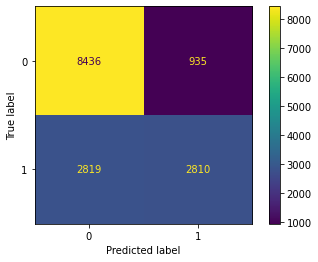

In [63]:
RFModel = RandomForestClassifier(random_state = 1234, max_depth=4)
RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)
y_pred = pd.Series(y_pred)

print("Random Forest Model - max depth - 4")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

plot_confusion_matrix(RFModel, X_test, y_test, values_format = '.5g')  
plt.show() 

In [64]:
coeffdf = pd.DataFrame(X_train.columns, columns=['features'])

coeffdf['feature_importance']=RFModel.feature_importances_
coeffdf.sort_values('feature_importance', ascending=False).head(10)

,features,feature_importance
6,avg_rating_by_driver,0.237055
3,surge_pct,0.181513
9,city_King's Landing,0.148593
2,avg_surge,0.144576
4,weekday_pct,0.123217
0,trips_in_first_30_days,0.052542
7,ultimate_black_user_ind,0.052284
8,city_Astapor,0.037060
10,city_Winterfell,0.014963
5,avg_dist,0.004997
